In [49]:
# importing libraries

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

import warnings
import itertools
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [2]:
# Reading the dataset
df = pd.read_csv('train.csv')

# Check the head of the dataset
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
# Displaying the number of rows and columns in the dataframe
df.shape

(69999, 172)

In [4]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [6]:
# total_og_*  is sum of roam_og_mou* + loc_og_mou* + stg_og_mou* + isd_og_mou* + spl_og_mou* +
# and loc_og_mou* = loc_og_t2o_mou* + loc_og_t2t_mou* + loc_og_t2f_mou* + loc_og_t2c_mou*
# Since we are interest in only total value dropping other columns

og_mou_columns = list(set(df.filter(regex='._og.')) - set(df.filter(regex='total_og.')))

df.drop(og_mou_columns, axis = 1, inplace = True)

In [7]:
# Since we are not interest in incoming call data, dropping those columns

df.drop(list(df.filter(regex='._ic.+mou_.')), axis = 1, inplace = True)

In [8]:
# Dropping the date columns as the date columns are not required in our analysis

# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]

# Dropping date columns
df = df.drop(date_cols, axis=1)

In [9]:
df.head()

,id,circle_id,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [10]:
df.columns

Index(['id', 'circle_id', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3

In [11]:
# Similarly considering acrynoms using regex, filtering out various features

total_amounts = [i for i in list(df.columns) if re.search('total.+amt',i)]
offnetwork_minutes = [i for i in list(df.columns) if re.search('offnet',i)]
volume_2g = [i for i in list(df.columns) if re.search('vol.+2g',i)]
volume_3g = [i for i in list(df.columns) if re.search('vol.+3g',i)]
average_revenue_2g = [i for i in list(df.columns) if re.search('arpu.+2g',i)]
average_revenue_3g = [i for i in list(df.columns) if re.search('arpu.+3g',i)]
total_outgoing_minutes = [i for i in list(df.columns) if re.search('total.+og.+mou',i)]
age_on_network = [i for i in list(df.columns) if re.search('aon',i)]

In [12]:
features = list(itertools.chain(total_amounts, offnetwork_minutes, volume_2g, volume_3g, average_revenue_2g, average_revenue_3g, total_outgoing_minutes, age_on_network))

In [13]:
features.extend(['id', 'circle_id', 'churn_probability'])
features

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'aon',
 'id',
 'circle_id',
 'churn_probability']

In [14]:
df = df[features].set_index('id')

In [15]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_rech_amt_6   69999 non-null  int64  
 1   total_rech_amt_7   69999 non-null  int64  
 2   total_rech_amt_8   69999 non-null  int64  
 3   offnet_mou_6       67231 non-null  float64
 4   offnet_mou_7       67312 non-null  float64
 5   offnet_mou_8       66296 non-null  float64
 6   vol_2g_mb_6        69999 non-null  float64
 7   vol_2g_mb_7        69999 non-null  float64
 8   vol_2g_mb_8        69999 non-null  float64
 9   vol_3g_mb_6        69999 non-null  float64
 10  vol_3g_mb_7        69999 non-null  float64
 11  vol_3g_mb_8        69999 non-null  float64
 12  arpu_2g_6          17568 non-null  float64
 13  arpu_2g_7          17865 non-null  float64
 14  arpu_2g_8          18417 non-null  float64
 15  arpu_3g_6          17568 non-null  float64
 16  arpu_3g_7          178

In [16]:
# Method which takes dataframe as input and returns null value percent
# of each column in the dataset in descending order.

def feature_null_value_percent(data_frame):
    percent = round((data_frame.isnull().sum() * 100) / len(data_frame), 2).sort_values(ascending=False)
    return percent[percent != 0]

In [17]:
feature_null_value_percent(df)

arpu_2g_6       74.90
arpu_3g_6       74.90
arpu_3g_7       74.48
arpu_2g_7       74.48
arpu_2g_8       73.69
arpu_3g_8       73.69
offnet_mou_8     5.29
offnet_mou_6     3.95
offnet_mou_7     3.84
dtype: float64

In [18]:
# Method to drop columns based on percentage thereshold of missing values

def drop_null_value_columns(data_frame, thereshold):
    dropped_columns = round((data_frame.isnull().sum() * 100) / len(data_frame), 2)
    dropped_columns = list(dropped_columns[dropped_columns.values >= thereshold].index)  
    print("Dropped columns are: ", dropped_columns)
    data_frame.drop(dropped_columns, axis =1, inplace = True)     
    return

In [19]:
drop_null_value_columns(df, 30)

Dropped columns are:  ['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']


In [20]:
feature_null_value_percent(df)

offnet_mou_8    5.29
offnet_mou_6    3.95
offnet_mou_7    3.84
dtype: float64

In [21]:
columns_with_single_values = [c for c in df.columns if df[c].nunique()==1]
columns_with_single_values

['circle_id']

In [22]:
# Dropping circle_id columns as it has unique values

df.drop(['circle_id'], axis = 1, inplace = True)

In [23]:
def impute_values(dataframe):
    for column in dataframe.columns:
        if dataframe[column].isnull().sum() > 0:
            if dataframe[column].dtype == 'float64':
                dataframe[column].fillna(dataframe[column].median(), inplace=True)
            elif dataframe[column].dtype == 'int':
                dataframe[column].fillna(dataframe[column].median(), inplace=True)
            elif dataframe[column].dtype == 'object':
                dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)

In [24]:
impute_values(df)

In [25]:
feature_null_value_percent(df)

Series([], dtype: float64)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_rech_amt_6   69999 non-null  int64  
 1   total_rech_amt_7   69999 non-null  int64  
 2   total_rech_amt_8   69999 non-null  int64  
 3   offnet_mou_6       69999 non-null  float64
 4   offnet_mou_7       69999 non-null  float64
 5   offnet_mou_8       69999 non-null  float64
 6   vol_2g_mb_6        69999 non-null  float64
 7   vol_2g_mb_7        69999 non-null  float64
 8   vol_2g_mb_8        69999 non-null  float64
 9   vol_3g_mb_6        69999 non-null  float64
 10  vol_3g_mb_7        69999 non-null  float64
 11  vol_3g_mb_8        69999 non-null  float64
 12  total_og_mou_6     69999 non-null  float64
 13  total_og_mou_7     69999 non-null  float64
 14  total_og_mou_8     69999 non-null  float64
 15  aon                69999 non-null  int64  
 16  churn_probability  699

In [27]:
X = df.drop(['churn_probability'], axis = 1)
y = df.iloc[:,-1]

In [28]:
# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 16), (14000, 16), (55999,), (14000,))

In [29]:
std_scalar = StandardScaler()
cols_scale = X_train.columns.to_list()
X_train[cols_scale] = std_scalar.fit_transform(X_train[cols_scale])

In [30]:
X_train

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,aon
id,,,,,,,,,,,,,,,,
64623,-0.789237,-0.837598,1.780485,0.372157,-0.104223,-0.072553,-0.243782,-0.243666,-0.234514,-0.218833,-0.232653,-0.242351,-0.360219,-0.410254,-0.588681,-0.065808
20608,-0.296276,-0.525516,-0.413055,-0.493778,-0.557792,-0.522264,-0.104288,-0.143064,0.054037,0.451294,-0.024160,0.215340,-0.536684,-0.572962,-0.531924,-0.429884
44743,-0.379740,-0.372076,-0.405456,-0.247023,-0.453197,-0.353556,-0.243782,-0.243666,-0.234514,-0.218833,-0.232653,-0.242351,-0.288024,-0.387281,-0.349045,-0.697154
53275,-0.857052,-0.603537,-0.590361,-0.315208,-0.523861,-0.453547,-0.243782,-0.243666,-0.234514,-0.218833,-0.232653,-0.242351,-0.652726,-0.507507,-0.443565,-0.607713
51804,-0.726639,-0.551523,-0.539702,-0.573078,-0.547940,-0.482850,-0.243782,-0.243666,-0.234514,-0.218833,-0.232653,-0.242351,-0.583008,-0.528439,-0.480936,1.383131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19014,-0.283234,-0.837598,-0.093902,-0.364317,-0.608185,-0.030477,-0.243782,-0.243666,-0.234514,-0.218833,-0.232653,-0.242351,-0.131820,-0.642850,-0.153496,-0.761341
51863,-0.570143,-0.551523,-0.818327,-0.330623,-0.296541,-0.498346,-0.243782,-0.243666,-0.234514,-0.218833,-0.232653,-0.242351,-0.458709,-0.438671,-0.563259,-0.087905
65555,-0.596226,-0.603537,-0.463714,-0.585594,-0.557477,-0.577457,-0.243782,-0.243666,-0.234514,-0.218833,-0.232653,-0.242351,-0.596219,-0.536481,-0.512992,-0.536161


## EDA and Data Preprocessing

<AxesSubplot:>

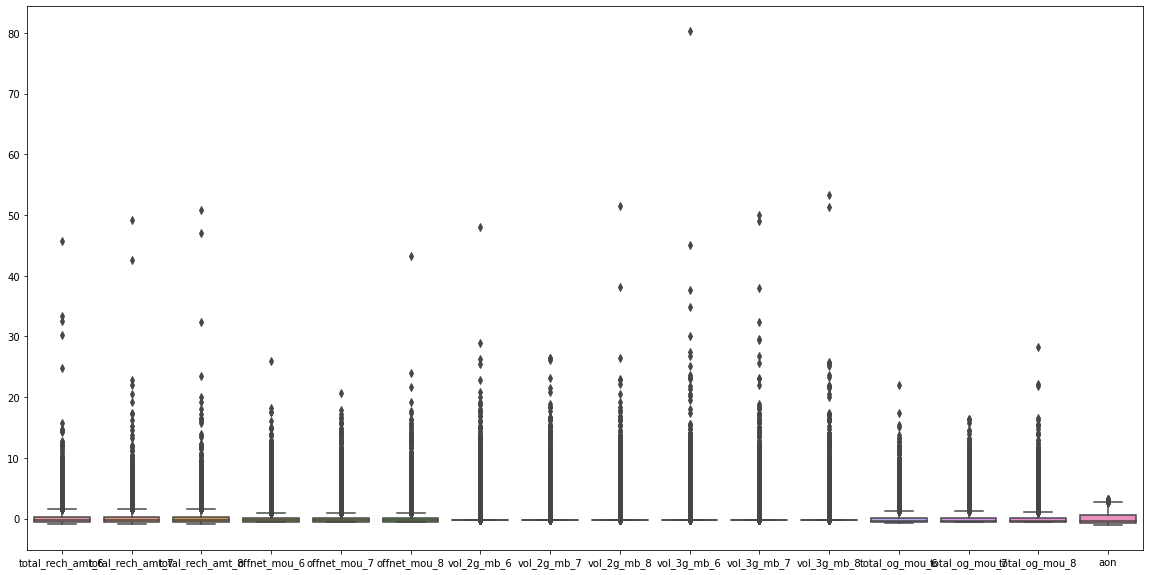

In [31]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = X_train)

### Outlier Treatment

In [32]:
def cap_outliers(arr, k = 3):
    upper_limit = arr.mean() + k * arr.std()
    lower_limit = arr.mean() - k * arr.std()
    arr[arr < lower_limit] = lower_limit
    arr[arr > upper_limit] = upper_limit
    return arr

In [33]:
X_train = X_train.apply(cap_outliers, axis=0)

<AxesSubplot:>

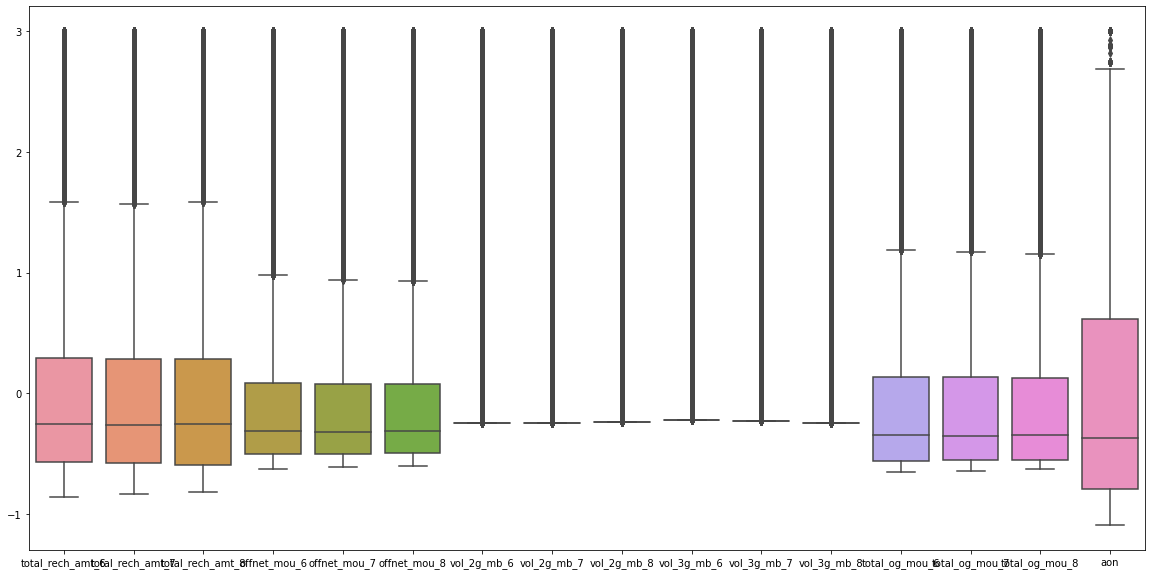

In [34]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = X_train)

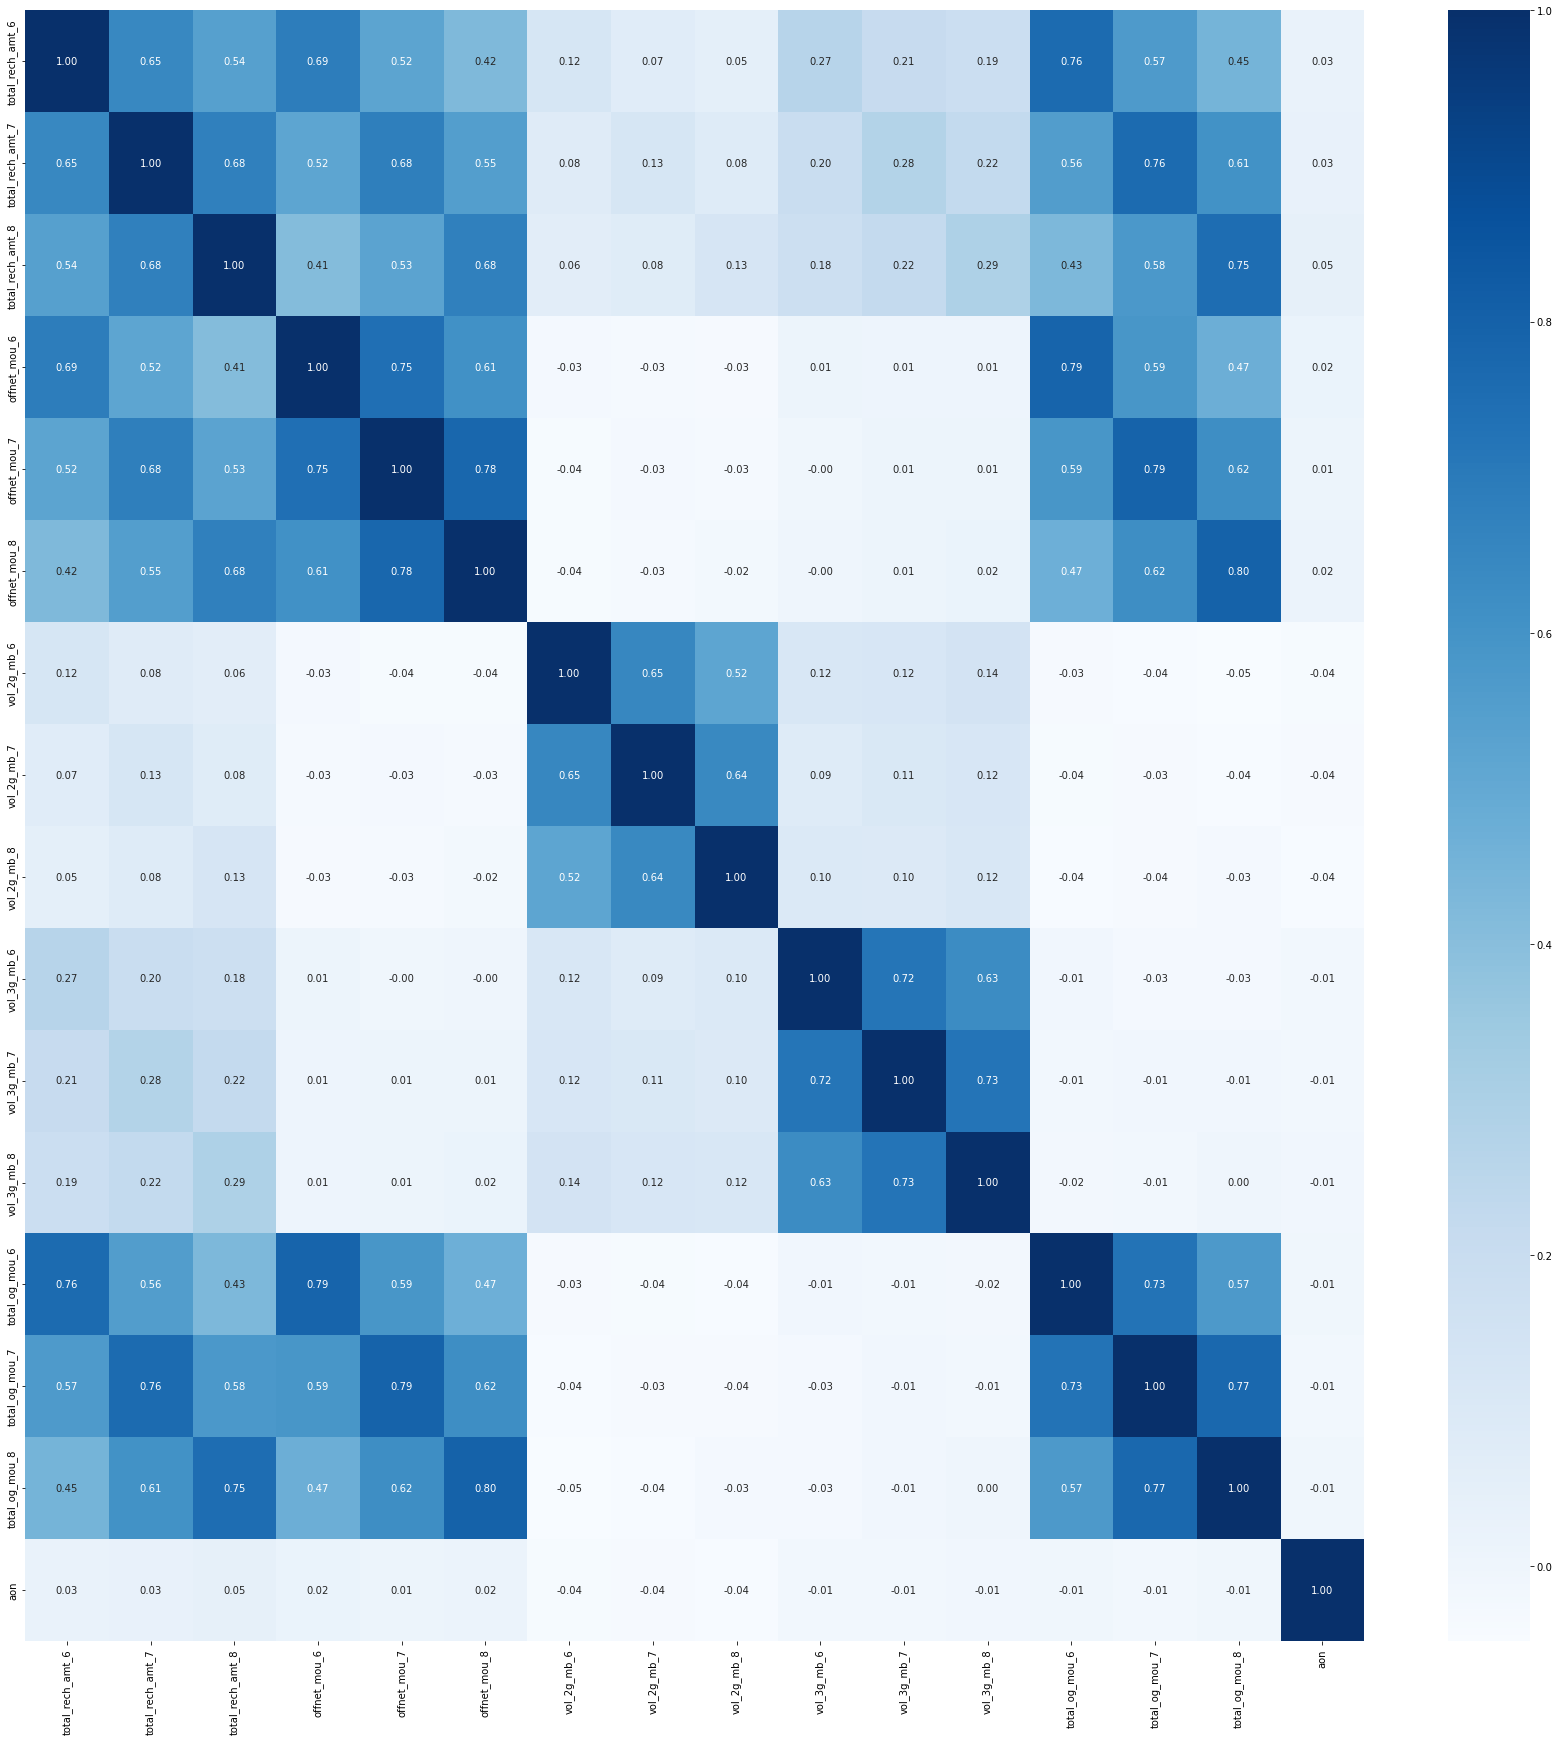

In [35]:
# Plotting Correlation graph

fig = plt.figure(figsize=(30, 30))

sns.heatmap(X_train.corr(), annot = True, cmap="Blues", fmt='.2f')
plt.show()

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(0.95, random_state=0).fit(X_train)

In [38]:
pca.explained_variance_ratio_

array([0.42447415, 0.12399206, 0.11347649, 0.08095157, 0.07431822,
       0.03753042, 0.03516646, 0.02299763, 0.02072063, 0.01646264])

In [39]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, 3) * 100)

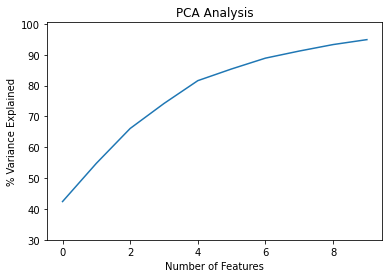

In [40]:
plt.plot(var)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30, 100.5)
plt.style.context('seaborn-whitegrid')

In [41]:
pca = PCA(n_components=11, random_state=0)
pca.fit(X_train)

X = pca.transform(X_train)

In [42]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_train, test_size=0.2, random_state=1)

### Building Different Models

In [44]:
logistic = LogisticRegression(class_weight = 'balanced')
decision_tree = DecisionTreeClassifier(class_weight = 'balanced')

#Bagging Algorithms
random_forest = RandomForestClassifier(n_estimators = 500, class_weight = 'balanced', n_jobs = -1)
voting_clf = VotingClassifier(estimators=[('lr', logistic), ('rf', random_forest), ('dt', decision_tree)], voting='soft')

In [45]:
def classify(classifier_list, X_train, y_train, X_test, y_test):
    for classifier in classifier_list:
        classifier.fit(X_train, y_train)
        classifier.predict(X_train)
        classifier.predict(X_test)
    
        train_score = classifier.score(X_train, y_train)
        test_score = classifier.score(X_test, y_test)
        
        train_scores.append(np.round(train_score, decimals=2))
        test_scores.append(np.round(test_score, decimals=2))
        classifiers.append(classifier.__class__.__name__)
        
        accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index = classifiers)

    return accuracy_frame

In [46]:
train_scores = []
test_scores  = []
classifiers  = []

clf_list=[logistic, decision_tree, random_forest]
accuracy_frame = classify(clf_list, X1_train, y1_train, X1_test, y1_test)

<AxesSubplot:title={'center':'Accuracies for Test and Train Datasets'}, xlabel='Models', ylabel='Accuracy'>

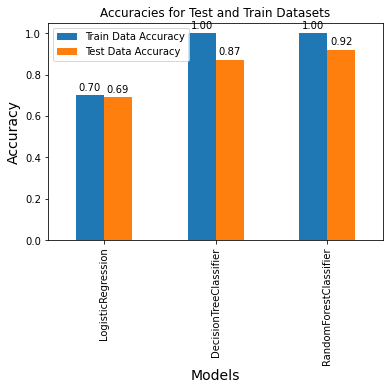

In [47]:
plots = accuracy_frame.plot(kind = "bar")
plt.title('Accuracies for Test and Train Datasets')
plt.xlabel('Models', fontsize =14)
plt.ylabel('Accuracy', fontsize =14)
plt.legend(labels=['Train Data Accuracy','Test Data Accuracy'])
for bar in plots.patches:
    plt.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, 
    bar.get_height()), ha='center', va='center', xytext=(0, 8),
    textcoords='offset points')
plots

In [50]:
imputer = SimpleImputer(strategy='constant', fill_value=0)

In [52]:
pipe = Pipeline(steps = [('imputation', imputer),
                         ('scaling', std_scalar),
                         ('pca', pca),
                         ('model', logistic)])

In [55]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('pca', PCA(n_components=11, random_state=0)),
                ('model', LogisticRegression(class_weight='balanced'))])

In [56]:
train_score = pipe.score(X_train, y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.6959588564081501


In [57]:
test_df = pd.read_csv('test.csv')
test_df.shape

(30000, 171)

In [58]:
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [60]:
data = test_df.set_index('id')[X_train.columns]
data.shape

(30000, 16)

In [61]:
data.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,aon
id,,,,,,,,,,,,,,,,
69999,103,90,60,60.16,32.16,34.83,0.0,0.0,0.0,0.0,0.0,0.0,91.94,52.39,57.94,1692
70000,500,500,500,474.34,621.84,394.94,0.0,0.0,0.0,0.0,0.0,0.0,549.86,663.06,415.59,2533
70001,500,1000,1000,16.98,45.81,45.04,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,277
70002,110,260,0,40.04,205.01,24.01,0.0,0.0,0.0,0.0,0.0,0.0,45.36,207.18,24.01,1244
70003,356,490,546,60.94,23.84,74.16,0.0,0.0,0.0,0.0,0.0,0.0,514.79,638.28,779.78,462


In [62]:
data['churn_probability'] = pipe.predict(data)

In [64]:
data.reset_index(level=0, inplace=True)


In [65]:
output = data[['id','churn_probability']]
output

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,1


In [66]:
output.to_csv('solution.csv',index=False)